In [1]:
import numpy as np
from types import SimpleNamespace
%load_ext autoreload
%autoreload 2

# optimizing and interpolation
from scipy import optimize
from scipy import interpolate
from copy import copy

# for plotting
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sns

plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = sns.color_palette()

plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.0
plt.rcParams["axes.xmargin"] = 0.01
plt.rcParams["axes.xmargin"] = 0.01
plt.rcParams["legend.edgecolor"] = "black"

# Consumption saving with borrowing

We are now considering the consumption-savings model with an extension: households may **borrow** money in the first period. Additionally, there are **2 kinds** of households: the first type will likely see a **low level** of period 2 income, whereas the second type will likely see a **high** second period income. 

A household lives for 2 periods and makes decisions on consumption and saving in each period.  

**Second period:**   
Solving the consumer problem in the second period is similar to the baseline case we have seen before.

The household gets utility from **consuming** and **leaving a bequest** (warm glow),

$$
\begin{aligned}
v_{2}(m_{2})&= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(a_2+\kappa)^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
a_2 &= m_2-c_2 \\
a_2 &\geq 0
\end{aligned}
$$

where
* $m_t$ is cash-on-hand 
* $c_t$ is consumption
* $a_t$ is end-of-period assets 
* $\rho > 1$ is the risk aversion coefficient
* $\nu > 0 $ is the strength of the bequest motive
* $\kappa > 0$ is the degree of luxuriousness in the bequest motive  
* $a_2\geq0$ ensures the household *cannot* die in debt

**First period:**   
The household gets utility from immediate consumption.  Household takes into account that next period income is stochastic.

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
a_1 & = m_1 - c_1 \\
m_2 & = (1+r)a_1 + y_2 \\
y_{2} & = \begin{cases}
1 - \Delta & \text{with prob. } P_{low}\\
1 + \Delta & \text{with prob. } P_{high} 
\end{cases}\\
a_1 & > -\frac{1-\Delta}{1+r} 
\end{aligned}
$$

where
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y_2$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk 
* $r$ is the interest rate
* $\frac{1-\Delta}{1+r} > c_1 - m_1$ ensures the household cannot borrow *more* than it will be able to repay in next period when $y_2$ is received.

The **2 types** of households are defined by their different $(P_{low},P_{high})$:
* Type 1: 
    * $P_{low} = 0.9$ 
    * $P_{high} = 0.1$
* Type 2:
    * $P_{low} = 0.1$ 
    * $P_{high} = 0.9$

## With classes now 

Everything is basically the same, however, we can store date better with classes.  
And I have made the model slighty more general, to fit a wider range of problems.

In [2]:
from cons_model import ConsModelExam

model = ConsModelExam()

In [3]:
model.solve()

**Question 1** Solve the model for each type of household. Plot the value functions $v_1(m_1)$ and $v_2(m_2)$ in one graph for each household type. Comment on the differences.

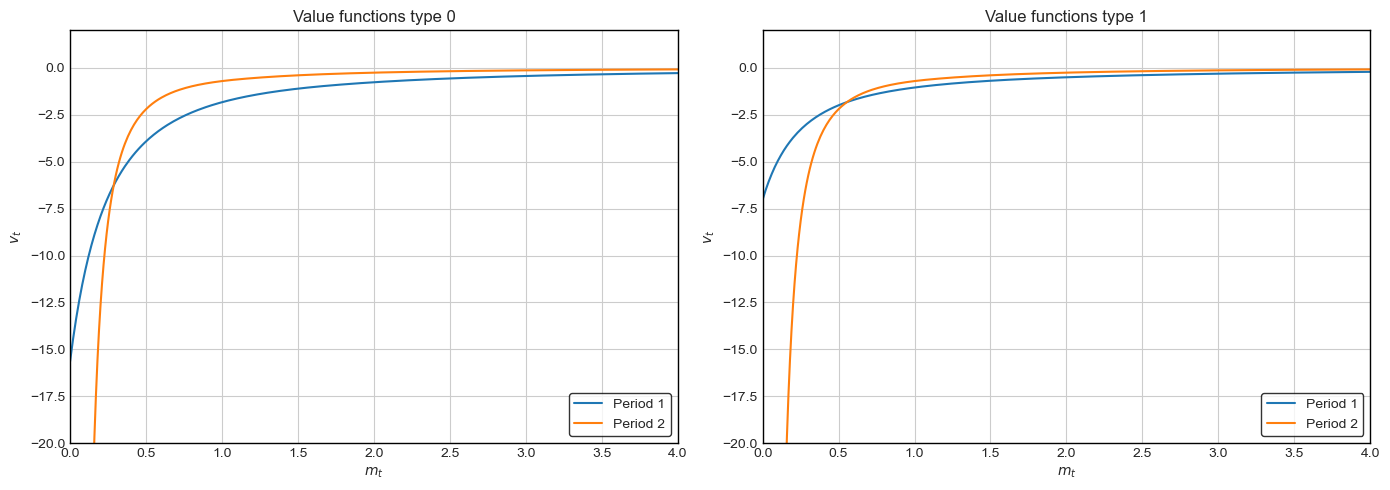

In [4]:
sol = model.sol
par = model.par

# b. Plot value functions for both types
fig = plt.figure(figsize=(14,5))
for i,_type in enumerate(par.types):    
    ax = fig.add_subplot(1,2,i+1)
    ax.plot(par.m_grid, sol.v[0,i], label=f'Period 1')
    ax.plot(par.m_grid, sol.v[1,i], label=f'Period 2')
    ax.legend(loc='lower right',facecolor='white',frameon=True)
    ax.set_xlabel('$m_t$')
    ax.set_ylabel('$v_t$')
    ax.set_title(f'Value functions type {i}');
    ax.set_xlim([0,4])
    ax.set_ylim([-20, 2]);

**Question 2** From the model solution, obtain the optimal consumption functions $c_1^*(m_1)$ and $c_2^*(m_2)$. Plot these in one graph for each type of household. Comment on the observed differences between household types. 

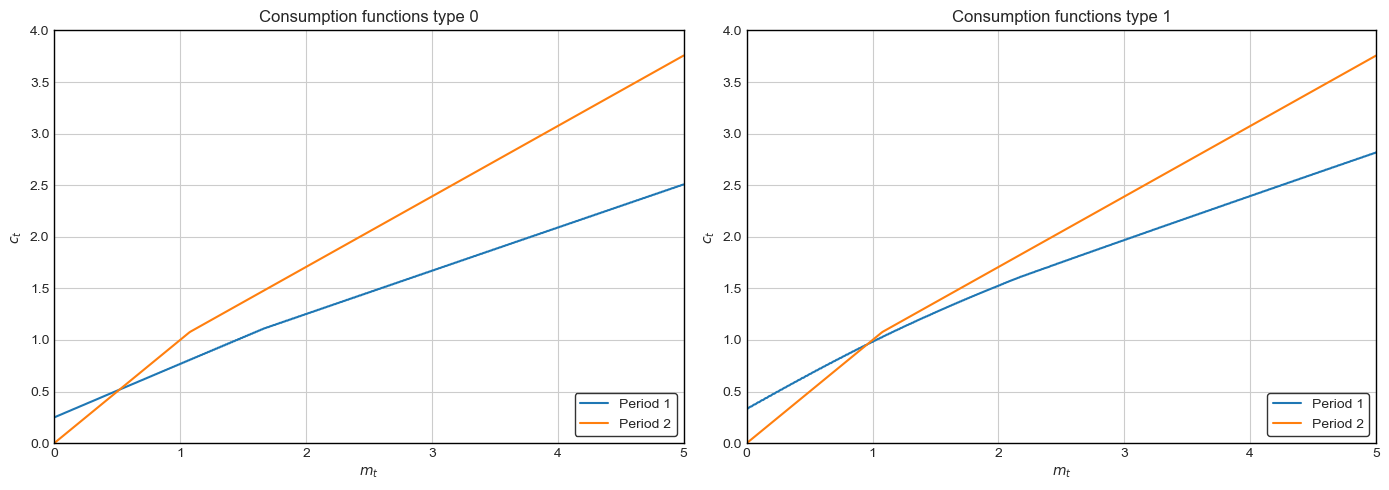

In [5]:
sol = model.sol
par = model.par

# b. Plot value functions for both types
fig = plt.figure(figsize=(14,5))
for i,_type in enumerate(par.types):    
    ax = fig.add_subplot(1,2,i+1)
    ax.plot(par.m_grid, sol.c[0,i], label=f'Period 1')
    ax.plot(par.m_grid, sol.c[1,i], label=f'Period 2')
    ax.legend(loc='lower right',facecolor='white',frameon=True)
    ax.set_xlabel('$m_t$')
    ax.set_ylabel('$c_t$')
    ax.set_title(f'Consumption functions type {i}');
    ax.set_xlim([0,5])
    ax.set_ylim([0, 4]);

**Question 3** Simulate `simN` households of each type based on the distribution of $m_1$ below. You can use the same distribution for both household types. What is the fraction of households who *borrow* in period 1, $c_1 > m_1$, in each group?

In [6]:
np.random.seed(2021) # this SHOULD not be needed

In [7]:
sim = model.sim

# simulate for each type 
# change type by changing the type array
sim_cs = []
for i in [1,2]:
    sim.types = i * np.ones(par.simN, dtype=int)
    model.simulate_good()   
    a = sim.c[0].copy()
    sim_cs.append( a )

sims  = np.array(sim_cs)
# b. Calculate the share of borrowers in period 1
for sim_c in sim_cs:
    borrowers = np.sum(sim_c > sim.m[0])/par.simN
    print(f'Share of borrowers in type {i}: {borrowers: .3f}')

# NOTE, these numbers should be similar to the other solution, but do not have to be same as the randomness i slighty different

Share of borrowers in type 2:  0.316
Share of borrowers in type 2:  0.482
